In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#lol hesham
# damn hesham, your jupyter game is weak

import matplotlib as mpl
mpl.rc("savefig", dpi=150)

In [175]:
df = pd.read_json("train.json")

# Data Preprocessing and Feature Engineering

In [176]:
def one_percent_cut(x, col):
    
    # cut data by 1st and 99th percentile
    llimit = np.percentile(x[col].values, 1)
    ulimit = np.percentile(x[col].values, 99)
    x[col].ix[x[col]<llimit] = llimit
    x[col].ix[x[col]>ulimit] = ulimit
    
    return x


def clean_preprocess(initial_df):
    """
    main preprocessing function
    """
    
    # convert created column into datetime type
    initial_df['DateTime'] = pd.to_datetime(initial_df.created)
    initial_df.drop('created', axis=1, inplace=True)
    
    # create feature for number of photos
    initial_df['num_of_photos'] = initial_df.photos.map(len)

    # potentially issues with the ordering
    initial_df = one_percent_cut(initial_df, 'latitude')
    initial_df = one_percent_cut(initial_df, 'longitude')
    initial_df = one_percent_cut(initial_df, 'price')
    
    
    return initial_df



df = clean_preprocess(df)

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Feature Creation

In [177]:
# distance from borough centres

the_bronx = [40.8448, -73.8648]
manhattan = [40.7831, -73.9712]
queens = [40.7282, -73.7949]
brooklyn = [40.6782, -73.9442]
staten_island = [40.5795, -74.1502]

borough_list = {'the_bronx': the_bronx, 'manhattan': manhattan, 'queens': queens, 'brooklyn': brooklyn, 'staten_island': staten_island}

def euclid_dist(x, lat, long):
    return np.sqrt((x[0]-lat)**2 + (x[1]-long)**2)

for key in borough_list:
    df[key] = df[['latitude','longitude']].apply(euclid_dist, args=(borough_list[key]), axis=1)

# Exploratory Data Analysis

In [178]:
df.head(3)

,bathrooms,bedrooms,building_id,description,display_address,features,interest_level,latitude,listing_id,longitude,...,photos,price,street_address,DateTime,num_of_photos,the_bronx,staten_island,queens,manhattan,brooklyn
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,...,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24 07:54:24,5,0.151708,0.247718,0.148234,0.074362,0.036340
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,...,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,2016-06-12 12:19:27,11,0.113550,0.282813,0.184221,0.012442,0.118653
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,...,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,2016-04-17 03:26:41,8,0.173220,0.217713,0.207171,0.053841,0.083607


In [179]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,num_of_photos,the_bronx,staten_island,queens,manhattan,brooklyn
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,40.751115,7.024055e+06,-73.972578,3610.277476,5.606946,0.146161,0.248508,0.183694,0.048353,0.087001
std,0.50142,1.115018,0.038373,1.262746e+05,0.028128,1847.162014,3.632283,0.035963,0.038842,0.024790,0.030830,0.028574
min,0.00000,0.000000,40.640400,6.811957e+06,-74.016200,1475.000000,0.000000,0.006181,0.147190,0.057751,0.000000,0.002102
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2500.000000,4.000000,0.117924,0.221901,0.170460,0.023817,0.071340
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3150.000000,5.000000,0.148899,0.243298,0.186888,0.039528,0.084350
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4100.000000,7.000000,0.169633,0.275789,0.199297,0.063132,0.099892
max,10.00000,8.000000,40.862047,7.753784e+06,-73.852651,13000.000000,68.000000,0.254365,0.410327,0.258629,0.185519,0.205380


In [180]:
df.columns.tolist()

['bathrooms',
 'bedrooms',
 'building_id',
 'description',
 'display_address',
 'features',
 'interest_level',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'DateTime',
 'num_of_photos',
 'the_bronx',
 'staten_island',
 'queens',
 'manhattan',
 'brooklyn']

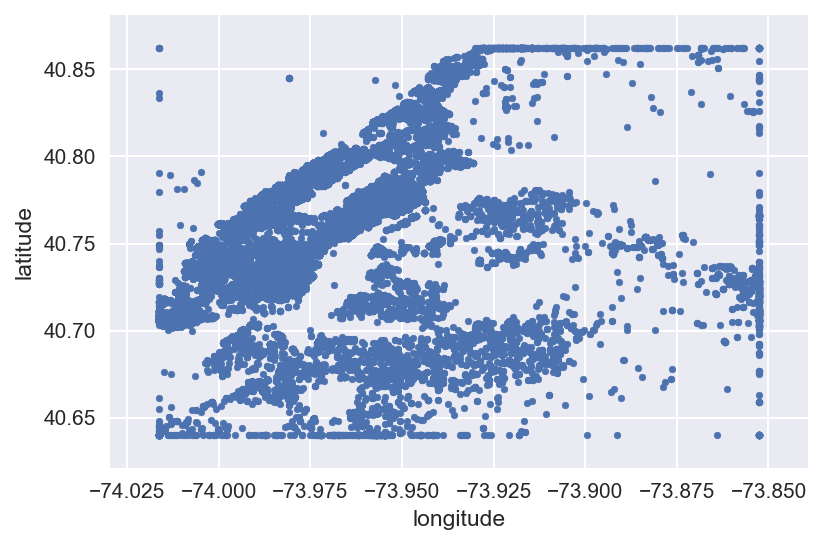

In [181]:
#position data: longitude/latitude

plt.scatter(df.longitude, df.latitude, s = 10)
plt.ylabel('latitude')
plt.xlabel('longitude')

In [182]:
"""
Considerations with the data:
    imbalanced dataset (not many high interest apartments compared to the rest)
    

Plots to produce
    barplot of interest levels - done
    map of interest levels
    price map
    

Features to use
    bathrooms
    bedrooms
    price

Additional features to create:
    Number of images
    description length
    creation year, month, day
    description word frequency - create features out of top x words
    distance to borough centres


Target:
    Interest Level
"""

'\nConsiderations with the data:\n    imbalanced dataset (not many high interest apartments compared to the rest)\n    \n\nPlots to produce\n    barplot of interest levels - done\n    map of interest levels\n    price map\n    \n\nFeatures to use\n    bathrooms\n    bedrooms\n    price\n\nAdditional features to create:\n    Number of images\n    description length\n    creation year, month, day\n    description word frequency - create features out of top x words\n    distance to borough centres\n\n\nTarget:\n    Interest Level\n'

### EDA - general

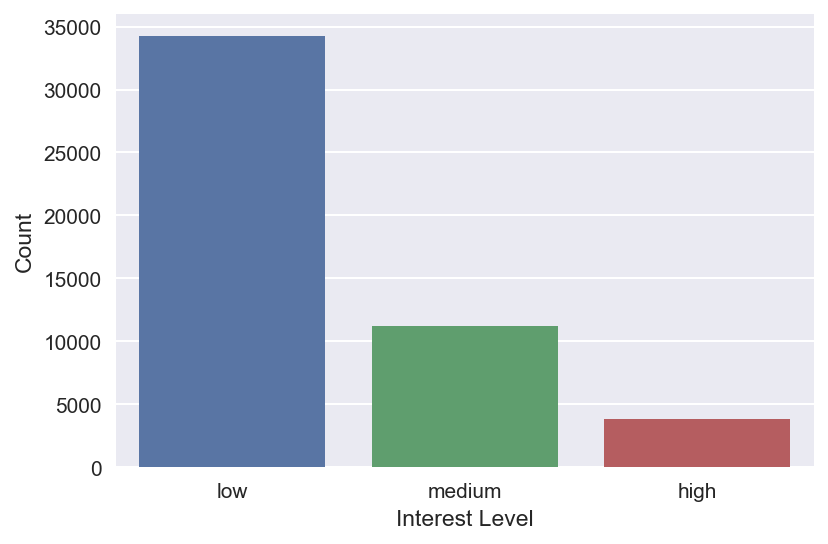

In [148]:
# plot of interest levels
interest_cat = df.interest_level.value_counts()
x = interest_cat.index
y = interest_cat.values

sns.barplot(x, y)
plt.ylabel("Count")
plt.xlabel("Interest Level")

In [149]:
df.interest_level.value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [150]:
df.groupby(by=['interest_level', 'bathrooms'])['interest_level'].count()

interest_level  bathrooms
high            0.0              1
                1.0           3413
                2.0            407
                3.0             14
                4.0              4
low             0.0            306
                1.0          26581
                1.5            605
                2.0           5566
                2.5            274
                3.0            671
                3.5             70
                4.0            150
                4.5             29
                5.0             20
                5.5              5
                6.0              4
                6.5              1
                7.0              1
                10.0             1
medium          0.0              6
                1.0           9428
                1.5             40
                2.0           1687
                2.5              3
                3.0             60
                4.0              5
Name: interest_level, dtype: 

### EDA - bedrooms

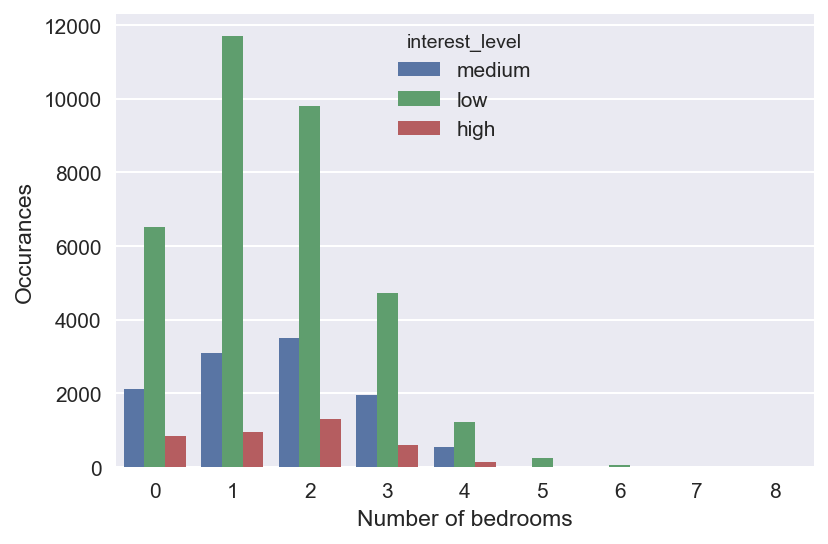

In [151]:
# bedrooms plot

sns.countplot(x='bedrooms',hue='interest_level', data=df)
plt.ylabel('Occurances')
plt.xlabel('Number of bedrooms')

### EDA - price

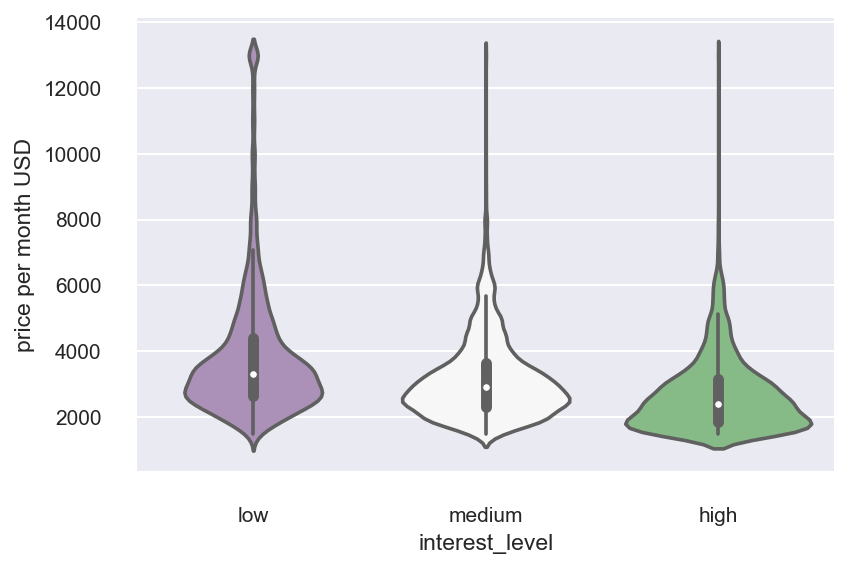

In [152]:
sns.violinplot(x="interest_level", y="price", data=df, palette="PRGn", order=['low','medium','high'])
sns.despine(offset=10, trim=True)
plt.ylabel('price per month USD')

In [153]:
df[['price','interest_level']].groupby('interest_level').mean()

,price
interest_level,
high,2685.334202
low,3861.478328
medium,3159.541633


In [154]:
df[['price','interest_level']].groupby('interest_level').std()

,price
interest_level,
high,1124.335029
low,2011.011083
medium,1236.220268


D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


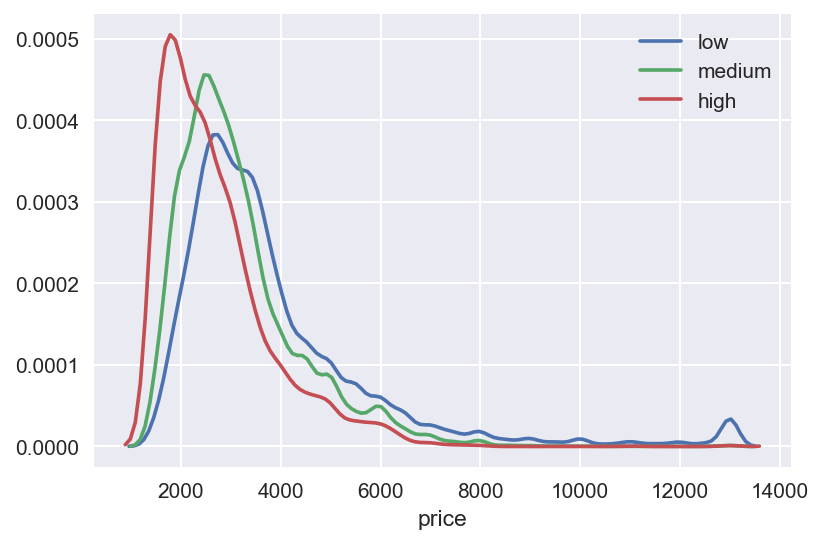

In [155]:
sns.distplot(df.price[df.interest_level == 'low'], hist=False, label='low')
sns.distplot(df.price[df.interest_level == 'medium'], hist=False, label='medium')
sns.distplot(df.price[df.interest_level == 'high'], hist=False, label='high')

In [156]:
df.head()

,bathrooms,bedrooms,building_id,description,display_address,features,interest_level,latitude,listing_id,longitude,...,photos,price,street_address,DateTime,num_of_photos,the_bronx,staten_island,queens,manhattan,brooklyn
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,...,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24 07:54:24,5,0.151708,0.247718,0.148234,0.074362,0.036340
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,...,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,2016-06-12 12:19:27,11,0.113550,0.282813,0.184221,0.012442,0.118653
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,...,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,2016-04-17 03:26:41,8,0.173220,0.217713,0.207171,0.053841,0.083607
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,...,[https://photos.renthop.com/2/6888711_6e660cee...,3275.0,333 East 49th Street,2016-04-18 02:22:02,3,0.137300,0.252431,0.174701,0.029409,0.079264
100013,1.0,4,0,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,...,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350.0,500 West 143rd Street,2016-04-28 01:32:41,3,0.086999,0.316528,0.181759,0.046482,0.145989


# Description BoW

In [157]:
import nltk
from nltk.stem import WordNetLemmatizer
import re, html


description = "A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted" 

wordFreqDict = {}
tag_re = re.compile(r'(<!--.*?-->|<[^>]*>)')

def makeFreqDict(description):
# takes a string, splits it up and add the occurances of each word to the dictionary
    no_tags = tag_re.sub('', description)
    description = html.escape(no_tags)   
    words = nltk.tokenize.word_tokenize(description)
    
    unimportant_words = [':', 'http', '.', ',', '?', '...', "'s", "n't", 'RT', ';', '&', ')', '``', 'u', '(', "''", '|',]
    for word in words:
        if word not in unimportant_words:
            word = WordNetLemmatizer().lemmatize(word)
    
            if word in wordFreqDict:
                wordFreqDict[word] += 1
            else:
                wordFreqDict[word] = 1
                        
makeFreqDict(description)

# Modelling

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score as cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [184]:
# quick check to see the available features
df.columns.tolist()

['bathrooms',
 'bedrooms',
 'building_id',
 'description',
 'display_address',
 'features',
 'interest_level',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'DateTime',
 'num_of_photos',
 'the_bronx',
 'staten_island',
 'queens',
 'manhattan',
 'brooklyn']

False

In [225]:
# determine features to use for modelling prior to data split
features_to_use = ['bathrooms','bedrooms','price', 'the_bronx', 'staten_island','manhattan','queens','brooklyn', 'num_of_photos']
X_all = df[features_to_use]

# convert target label into numerical (ordinal)
target_conversion = {'low':0,'medium':1,'high':2}
y_all = df.interest_level.map(target_conversion).values

X_train_val, X_test, y_train_val, y_test = train_test_split(X_all, y_all, test_size=0.1, random_state=0, stratify=y_all)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=0, stratify=y_train_val)


# learn scale parameters from final training set and apply to training, val, and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# some algorithms require dummy values for multiclass classification
# target = pd.get_dummies(train.interest_level)

In [226]:
X_train_scaled

array([[-0.42313049,  0.41186197, -0.11409736, ...,  0.5623036 ,
         0.2218881 ,  0.38124105],
       [-0.42313049, -0.48681545, -0.35785012, ...,  0.50841767,
         0.31969819, -0.16826513],
       [-0.42313049, -1.38549287,  0.10257176, ...,  0.44856481,
        -0.52560798, -0.44301822],
       ..., 
       [-0.42313049, -0.48681545, -0.92660657, ..., -3.6846617 ,
         0.33841926,  0.10648796],
       [-0.42313049, -0.48681545, -0.98077385, ..., -0.85771053,
         0.20423734, -0.71777132],
       [-0.42313049,  0.41186197, -0.57451924, ...,  0.42933801,
        -0.74805145, -0.44301822]])

In [227]:
#model = RandomForestClassifier(n_estimators=100)
model = LogisticRegression()

In [229]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [204]:
y_hat = model.predict_proba(X_val)

In [205]:
confusion_matrix(y_val, y_hat)

ValueError: Can't handle mix of multiclass and continuous-multioutput

In [230]:
model.score(X_val_scaled, y_val)

0.69518235029266096

In [231]:
model.score(X_test_scaled, y_test)

0.69651539708265797

In [233]:
y_hat_train = model.predict_proba(X_train_scaled)
y_hat_val = model.predict_proba(X_val_scaled)

In [234]:
# log loss evaluations for train, val
log_loss(y_train, y_hat_train)

0.71886324480283548

In [235]:
log_loss(y_val, y_hat_val)

0.71867299757240255

In [116]:
# normalise all data
# split data into train val and test sets
# use random with set seed for repeatable results
# check the labels to ensure good split between classes

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(features, target)
clf.feature_importances_

array([ 0.10157233,  0.11870776,  0.08871097,  0.11573683,  0.11138694,
        0.11048775,  0.12007448,  0.11064786,  0.12267508])

In [207]:
log_loss(y_val, y_hat)

0.73385891314671969

In [208]:
target == y_hat

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


False

In [120]:
y_hat

array([[ 0.694619  ,  0.22756363,  0.07781737],
       [ 0.6944967 ,  0.22765372,  0.07784958],
       [ 0.69384861,  0.22813769,  0.0780137 ],
       ..., 
       [ 0.69515504,  0.22715955,  0.07768541],
       [ 0.69401815,  0.22800926,  0.07797259],
       [ 0.6934295 ,  0.22845344,  0.07811706]])